# Cab Booking Cancellations

The data for this project was obtained from [Kaggle](https://www.kaggle.com/c/predicting-cab-booking-cancellations).

## Table of contents

1. [Introduction](#introduction)
2. [Required libraries](#reqlib)
3. [Problem definition](#problemdef)
4. [Basic information](#basicinfo)
5. [Exploratory Data Analysis](#eda)
    * [Package Type](#pcktype)
    * [Travel Type](#trvltype)
    * [from_area_id](#faid)
    * [to_area_id](#taid)
    * [Online & Mobile Bookings](#onmob)
    * [booking_created & from_date](#fromdate)
6. [Data Preparation](#dpw)

## Introduction <a name="introduction"></a>

The business problem tackled here is trying to improve customer service for YourCabs.com, a cab company in Bangalore. The problem of interest is booking cancellations by the company due to unavailability of a car. The challenge is that cancellations can occur very close to the trip start time, thereby causing passengers inconvenience.

The cab bookings data are made available through a collaboration between Prof. Galit Shmueli at the Indian School of Business and YourCabs co-founder Mr. Rajath Kedilaya and IDRC managing partner, Mr. Amit Batra.

## Required Libraries <a name="reqlib"></a>

The primary libraries that we'll be using are:

* **NumPy**: adds support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
* **pandas**: library for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.
* **matplotlib**: basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: advanced statistical plotting library.

## Problem Definition <a name="problemdef"></a>

The first step of a data science project is to understand the problem at hand, to define the question or problem we're looking to solve.

* **What is the context of the problem and its scientific or business application?**

The business problem tackled here is trying to improve customer service for YourCabs.com, a cab company in Bangalore. The problem of interest is booking cancellations by the company due to unavailability of a car. The challenge is that cancellations can occur very close to the trip start time, thereby causing passengers inconvenience.

* **What type of analytical problem are we trying to solve?**

This is a classification task. For each observation, a (1) is assigned if the booking was cancelled, and a (0) is assigned if it wasn’t.

## Basic Information <a name="basicinfo"></a>

____
### Checking the data

The next step is to look at the data we have and understand what each of the variables mean. Let's take a look at the data fields:


* **id** - booking ID
* **user_id** - the ID of the customer (based on mobile number)
* **vehicle_model_id** - vehicle model type.
* **package_id** - type of package (1=4hrs & 40kms, 2=8hrs & 80kms, 3=6hrs & 60kms, 4= 10hrs & 100kms, 5=5hrs & 50kms, 6=3hrs & 30kms, 7=12hrs & 120kms)
* **travel_type_id** - type of travel (1=long distance, 2= point to point, 3= hourly rental).
* **from_area_id** - unique identifier of area. Applicable only for point-to-point travel and packages
* **to_area_id** - unique identifier of area. Applicable only for point-to-point travel
* **from_city_id** - unique identifier of city
* **to_city_id** - unique identifier of city (only for intercity)
* **from_date** - time stamp of requested trip start
* **to_date** - time stamp of trip end
* **online_booking** - if booking was done on desktop website
* **mobile_site_booking** - if booking was done on mobile website
* **booking_created** - time stamp of booking
* **from_lat** - latitude of from area
* **from_long** -  longitude of from area
* **to_lat** - latitude of to area
* **to_long** - longitude of to area
* **Car_Cancellation (available only in training data)** - whether the booking was cancelled (1) or not (0) due to unavailability of a car.
* **Cost_of_error (available only in training data)** - the cost incurred if the booking is misclassified. The cost associated with misclassifying an un-cancelled booking is 1. The cost associated with misclassifying a cancelled booking as uncancelled is a function of how close the cancellation occurs relative to the trip start time. The closer the trip, the higher the cost. Cancellations occurring less than 15 minutes prior to the trip start incur a fixed penalty of 100 units.


____
### Setup and data loading

** Import NumPy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

** Load data to a dataframe and preview data **

In [3]:
df_train = pd.read_csv("Kaggle_YourCabs_training.csv")
df_train.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 20 columns):
id                     43431 non-null int64
user_id                43431 non-null int64
vehicle_model_id       43431 non-null int64
package_id             7550 non-null float64
travel_type_id         43431 non-null int64
from_area_id           43343 non-null float64
to_area_id             34293 non-null float64
from_city_id           16345 non-null float64
to_city_id             1588 non-null float64
from_date              43431 non-null object
to_date                25541 non-null float64
online_booking         43431 non-null int64
mobile_site_booking    43431 non-null int64
booking_created        43431 non-null object
from_lat               43338 non-null float64
from_long              43338 non-null float64
to_lat                 34293 non-null float64
to_long                34293 non-null float64
Car_Cancellation       43431 non-null int64
Cost_of_error          43431 non-nu

** As we can see, the training dataset has 43431 entries, there are various columns with missing values and some columns which need to be converted to date-time. Now let's convert date columns to date-time format. **

In [5]:
# convert from_date column to date-time
# Note: when we try to convert NaN to date-time, it gets converted to NaT( Not a timestamp )

df_train['from_date'] = pd.to_datetime(df_train['from_date'])

In [6]:
# convert to_date column to date-time

df_train['to_date'] = pd.to_datetime(df_train['to_date'])

In [7]:
# convert booking_created column to date-time

df_train['booking_created'] = pd.to_datetime(df_train['booking_created'])

** Let's set id to be the index of the dataset **

In [8]:
df_train.set_index("id", inplace=True) # By default drops the "id" column

**Let's see the number of bookings that were cancelled and uncancelled**

In [9]:
df_train["Car_Cancellation"].value_counts()

0    40299
1     3132
Name: Car_Cancellation, dtype: int64

7.2% of the bookings were cancelled, thus, there are few cancellations compared to the number of non-cancellations.

** Most frequent city of origin **

In [10]:
df_train["from_city_id"].value_counts()

15.0    16233
1.0       106
31.0        6
Name: from_city_id, dtype: int64

** Most frequent destination **

In [11]:
df_train["to_city_id"].value_counts().head(10)

32.0     475
55.0     174
29.0     116
146.0     89
108.0     64
41.0      27
147.0     26
44.0      26
58.0      26
131.0     26
Name: to_city_id, dtype: int64

** Number of online bookings **

In [12]:
df_train["online_booking"].sum()

15270

** Number of mobile bookings **

In [13]:
df_train["mobile_site_booking"].sum()

1878

** Number of unique users **

In [14]:
df_train["user_id"].nunique()

22267

** Most frequent users **

In [15]:
df_train["user_id"].value_counts().head(10)

29648    471
868      245
27458    211
32527    202
34972    198
33002    187
29275    185
32023    125
30290    120
38538    105
Name: user_id, dtype: int64

** Most frequent travel type **

In [16]:
df_train["travel_type_id"].value_counts().head(10)

2    34292
3     7550
1     1589
Name: travel_type_id, dtype: int64

** Most frequent package type **

In [17]:
df_train["package_id"].value_counts().head(10)

1.0    3503
2.0    2651
6.0     502
4.0     412
3.0     375
7.0     101
5.0       6
Name: package_id, dtype: int64

## Exploratory Data Analysis <a name="eda"></a>

**Let's start by analysing the effect of different variables on our response**

### Package type <a name="pcktype"></a>

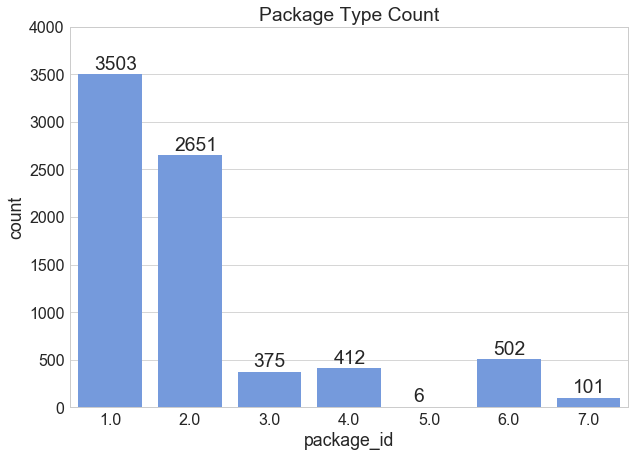

In [18]:
sns.set_style('whitegrid')
sns.set_context(context="paper", font_scale=2)
plt.figure (figsize=(10,7))
ax = sns.countplot(df_train["package_id"],color="cornflowerblue")
ax.set_title("Package Type Count")
ax.set_ylim([0,4000])
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+50))

** The most common packages are for a journey of 4hrs & 40kms, followed by 8hrs & 80kms.**

**Let's see whether package type affects car cancellations.**

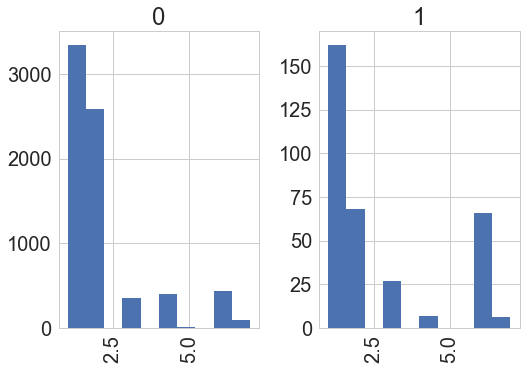

In [19]:
sns.set_context(context="notebook", font_scale=2)
df_train.hist(column='package_id', by='Car_Cancellation');

**Most cancellations occur for package type 1 because it's the most common package. Instead of plotting the absolute count of cancellations / non-cancellations for the different types, it's more useful to plot the percentages of cancelations for each of them, this way we can easily compare them.**

In [20]:
sub_df=df_train.groupby(["package_id", "Car_Cancellation"]).count()["user_id"]
per_unc = [] # list that contains the percentage of non-cancellations for each group
per_can = [] # list that contains the percentage of non-cancellations for each group
for i in sub_df.index.levels[0]:
    if len(sub_df[i]) > 1:
        per_unc.append(sub_df[i][0]/(sub_df[i][0] + sub_df[i][1]))
        per_can.append(sub_df[i][1]/(sub_df[i][0] + sub_df[i][1]))
    elif sub_df[i].index[0] == 0: # If the only index is 0 then all entries correspond to non-cancellations
        per_unc.append(1)
        per_can.append(0)
    else: # If the only index is 0 then all entries correspond to non-cancellations
        per_unc.append(0)
        per_can.append(1)
per_unc=np.array(per_unc)
per_can=np.array(per_can)

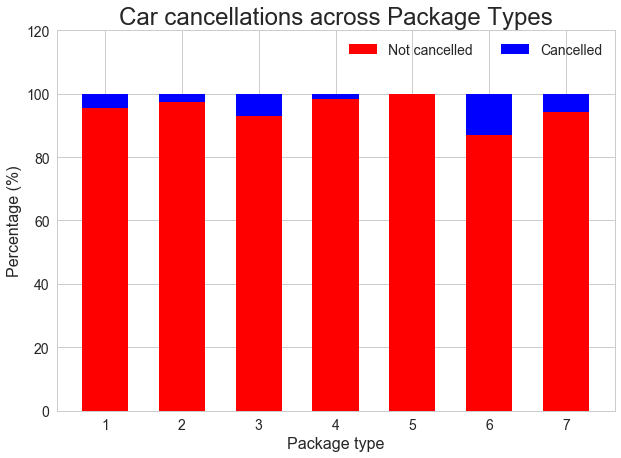

In [21]:
plt.figure (figsize=(10,7))

N = 7  # number of groups
ind = np.arange(1,N+1)
p1 = plt.bar(ind, per_unc*100, width=0.6, color='r')
p2 = plt.bar(ind, per_can*100, width=0.6, bottom=per_unc*100, color='b')

plt.ylim([0,120])
plt.yticks(fontsize=14)
plt.ylabel('Percentage (%)', fontsize=16)
plt.xticks(ind, fontsize=14)
plt.xlabel('Package type', fontsize=16)
plt.title("Car cancellations across Package Types")
plt.legend((p1[0], p2[0]), ("Not cancelled", "Cancelled"), fontsize=14, ncol=4, framealpha=0, fancybox=True)

** It seems that it's more likely for package type 6 (3hrs & 30kms) to get cancelled, followed by package type 3 (6hrs & 60kms).**

### Travel type <a name="trvltype"></a>

In [22]:
sub_df2=df_train.groupby(["travel_type_id", "Car_Cancellation"]).count()["user_id"]
per_unc = [] # list that contains the percentage of non-cancellations for each group
per_can = [] # list that contains the percentage of non-cancellations for each group
for i in sub_df2.index.levels[0]:
    if len(sub_df2[i]) > 1:
        per_unc.append(sub_df2[i][0]/(sub_df2[i][0] + sub_df2[i][1]))
        per_can.append(sub_df2[i][1]/(sub_df2[i][0] + sub_df2[i][1]))
    elif sub_df2[i].index[0] == 0: # If the only index is 0 then all entries correspond to non-cancellations
        per_unc.append(1)
        per_can.append(0)
    else: # If the only index is 0 then all entries correspond to non-cancellations
        per_unc.append(0)
        per_can.append(1)
per_unc=np.array(per_unc)
per_can=np.array(per_can)

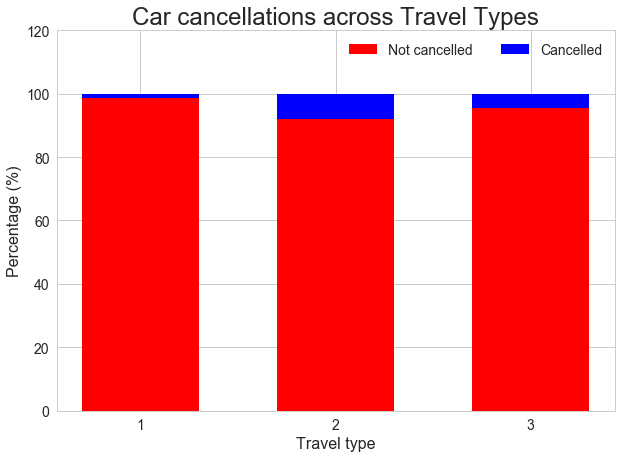

In [23]:
plt.figure (figsize=(10,7))

N = 3  # number of groups
ind = np.arange(1,N+1)
p1 = plt.bar(ind, per_unc*100, width=0.6, color='r')
p2 = plt.bar(ind, per_can*100, width=0.6, bottom=per_unc*100, color='b')

plt.ylim([0,120])
plt.yticks(fontsize=14)
plt.ylabel('Percentage (%)', fontsize=16)
plt.xticks(ind, fontsize=14)
plt.xlabel('Travel type', fontsize=16)
plt.title("Car cancellations across Travel Types")
plt.legend((p1[0], p2[0]), ("Not cancelled", "Cancelled"), fontsize=14, ncol=4, framealpha=0, fancybox=True)

In [24]:
# Count of travel types
df_train["travel_type_id"].value_counts().head(10)

2    34292
3     7550
1     1589
Name: travel_type_id, dtype: int64

** It makes sense that the most common type of travel is point to point (type 2), it's also the most frequently cancelled (around 8% of these bookings get cancelled). The less frequent is type 1 (long distance) which is also the less frequently cancelled (only around 1% of these bookings get cancelled). **

### from_area_id <a name="faid"></a>

In [25]:
faid = df_train.groupby(['from_area_id', 'Car_Cancellation']).size().unstack(1)

In [26]:
faid.head()

Car_Cancellation,0,1
from_area_id,,
2.0,27.0,4.0
6.0,7.0,NaN
15.0,6.0,NaN
16.0,5.0,NaN
17.0,2.0,NaN


In [27]:
faid_percent_cancelled = (faid[1] / (faid[0] + faid [1]))*100

In [28]:
faid_percent_cancelled.sort_values(ascending=False).head(20)

from_area_id
130.0     80.000000
1148.0    66.666667
1174.0    66.666667
630.0     66.666667
176.0     52.830189
1381.0    50.000000
1160.0    50.000000
1100.0    50.000000
1385.0    50.000000
1276.0    45.454545
211.0     44.444444
1372.0    40.000000
356.0     40.000000
987.0     40.000000
626.0     34.375000
1258.0    33.333333
34.0      33.333333
326.0     33.333333
177.0     33.333333
833.0     33.333333
dtype: float64

** As we can see, for certain areas (from area) more than 50% of the bookings were cancelled. However, it should be noted that these results could be the consequence of not having enough observations for these areas. To obtain more meaningful results let’s discard areas with less than 10 entries.**

In [29]:
from_area_counts = df_train['from_area_id'].value_counts().rename('from_area_counts')

In [30]:
df_train2 = df_train.merge(from_area_counts.to_frame(), left_on='from_area_id', right_index=True)

In [31]:
faid2 = df_train2[df_train2["from_area_counts"]>10].groupby(['from_area_id', 'Car_Cancellation']).size().unstack(1)

In [32]:
faid_percent_cancelled2 = (faid2[1] / (faid2[0] + faid2 [1]))*100

In [33]:
faid_percent_cancelled2.sort_values(ascending=False).head(20)

from_area_id
176.0     52.830189
1276.0    45.454545
356.0     40.000000
626.0     34.375000
34.0      33.333333
264.0     32.142857
1379.0    30.303030
839.0     30.000000
1349.0    29.729730
1378.0    28.571429
1130.0    27.777778
1216.0    27.272727
186.0     26.923077
49.0      25.000000
222.0     25.000000
1351.0    24.657534
1074.0    23.076923
1033.0    21.951220
1274.0    21.428571
1283.0    21.276596
dtype: float64

**When we consider at least 10 entries of from_area_id, the area with most cancellations is area 176.0 (from_area_id).**

### to_area_id <a name="taid"></a>

In [34]:
to_area_counts = df_train['to_area_id'].value_counts().rename('to_area_counts')

In [35]:
df_train3 = df_train.merge(to_area_counts.to_frame(), left_on='to_area_id', right_index=True)

In [36]:
taid = df_train3[df_train3["to_area_counts"]>10].groupby(['to_area_id', 'Car_Cancellation']).size().unstack(1)

In [37]:
taid_percent_cancelled = (taid[1] / (taid[0] + taid [1]))*100

In [38]:
taid_percent_cancelled.sort_values(ascending=False).head(20)

to_area_id
122.0     41.463415
626.0     40.000000
1161.0    33.333333
278.0     33.333333
160.0     33.333333
176.0     32.307692
1372.0    31.250000
1375.0    30.769231
1013.0    28.571429
1186.0    28.571429
1370.0    27.777778
212.0     27.272727
1395.0    27.272727
1351.0    26.666667
1204.0    26.086957
1270.0    25.925926
157.0     25.000000
1077.0    25.000000
1063.0    25.000000
417.0     25.000000
dtype: float64

**When we consider at least 10 entries of to_area_id, the destination with most cancellations is area 122.0 (to_area_id), closely followed by area 626.0.**

**Let's now study the routes with the most cancellations.**

In [39]:
from_to = df_train.groupby(['from_area_id', 'to_area_id', 'Car_Cancellation']).size()

In [40]:
f_t = from_to.unstack(2)

In [41]:
f_t.head()

Car_Cancellation            0    1
from_area_id to_area_id           
2.0          222.0        1.0  NaN
             393.0       12.0  NaN
             452.0        1.0  NaN
             455.0        NaN  1.0
             572.0        NaN  1.0

In [42]:
f_t['percent_cancelled'] = (f_t[1] / (f_t[0] + f_t[1])) * 100

In [43]:
f_t.percent_cancelled.sort_values(ascending=False).head(20)

from_area_id  to_area_id
626.0         122.0         90.909091
1349.0        1052.0        83.333333
1330.0        176.0         80.000000
1052.0        1349.0        78.571429
625.0         452.0         75.000000
1296.0        793.0         75.000000
1365.0        293.0         75.000000
1285.0        61.0          70.588235
122.0         626.0         70.000000
176.0         136.0         66.666667
1068.0        352.0         66.666667
264.0         585.0         66.666667
1384.0        160.0         66.666667
839.0         585.0         66.666667
571.0         396.0         66.666667
83.0          176.0         66.666667
1095.0        25.0          66.666667
363.0         1068.0        66.666667
542.0         1237.0        66.666667
541.0         83.0          66.666667
Name: percent_cancelled, dtype: float64

**There are some routes for which the cancellation rate is very high, for instance from area 626 to area 122 for which almost 91% of the bookings were cancelled, this is coherent with our previous analysis (626 is one of the areas of from_area_id with the most cancellations, and 122 and 626 are the destinations with the most cancellations).**

### Online & Mobile Bookings <a name="onmob"></a>

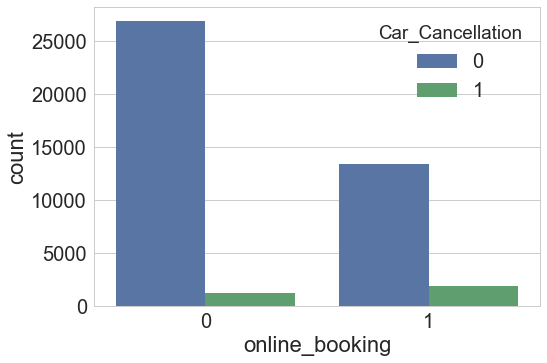

In [44]:
sns.countplot("online_booking", data=df_train, hue="Car_Cancellation")

In [45]:
df_train.groupby(["online_booking","Car_Cancellation"]).size()

online_booking  Car_Cancellation
0               0                   26932
                1                    1229
1               0                   13367
                1                    1903
dtype: int64

**12.5% of online bookings were cancelled**

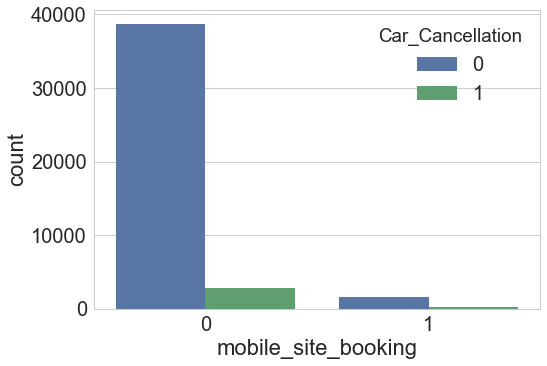

In [46]:
sns.countplot("mobile_site_booking", data=df_train, hue="Car_Cancellation")

In [47]:
df_train.groupby(["mobile_site_booking","Car_Cancellation"]).size()

mobile_site_booking  Car_Cancellation
0                    0                   38710
                     1                    2843
1                    0                    1589
                     1                     289
dtype: int64

**On the other hand 15.4% of mobile bookings were cancelled.**

In [48]:
df_train[(df_train["online_booking"]==0) & (df_train["mobile_site_booking"]==0)].groupby("Car_Cancellation").size()

Car_Cancellation
0    25343
1      940
dtype: int64

**Finally, 3.6% of the bookings that were made neither online nor on the mobile site were cancelled.**

### Relation of number of days between booking date and trip's start date with cancellation <a name="fromdate"></a>

In [49]:
booking_diff = df_train[df_train["from_date"] > df_train["booking_created"]][['from_date', 'to_date', 'booking_created', 'Car_Cancellation']] 
#Selects only rows in which the booking creation date registered is lower than the from_date registered (because
#this is not always the case)

In [50]:
booking_diff['difference'] = booking_diff['from_date'] - booking_diff['booking_created']

In [51]:
booking_diff.head()

,from_date,to_date,booking_created,Car_Cancellation,difference
id,,,,,
132512,2013-01-01 02:00:00,NaT,2013-01-01 01:39:00,0,00:21:00
132513,2013-01-01 09:00:00,NaT,2013-01-01 02:25:00,0,06:35:00
132514,2013-01-01 03:30:00,NaT,2013-01-01 03:08:00,0,00:22:00
132515,2013-01-01 05:45:00,NaT,2013-01-01 04:39:00,0,01:06:00
132517,2013-01-01 09:00:00,NaT,2013-01-01 07:53:00,0,01:07:00


In [52]:
booking_diff["days_diff"] = booking_diff["difference"].apply(lambda x: x.total_seconds()/86400)

In [53]:
booking_diff.head()

,from_date,to_date,booking_created,Car_Cancellation,difference,days_diff
id,,,,,,
132512,2013-01-01 02:00:00,NaT,2013-01-01 01:39:00,0,00:21:00,0.014583
132513,2013-01-01 09:00:00,NaT,2013-01-01 02:25:00,0,06:35:00,0.274306
132514,2013-01-01 03:30:00,NaT,2013-01-01 03:08:00,0,00:22:00,0.015278
132515,2013-01-01 05:45:00,NaT,2013-01-01 04:39:00,0,01:06:00,0.045833
132517,2013-01-01 09:00:00,NaT,2013-01-01 07:53:00,0,01:07:00,0.046528


In [54]:
booking_diff.groupby("Car_Cancellation").describe()["days_diff"]

,count,mean,std,min,25%,50%,75%,max
Car_Cancellation,,,,,,,,
0,40257.0,1.391893,3.795317,0.000694,0.127083,0.379861,0.784028,79.454167
1,3131.0,1.722053,5.341344,0.013194,0.084028,0.195139,0.454167,49.839583


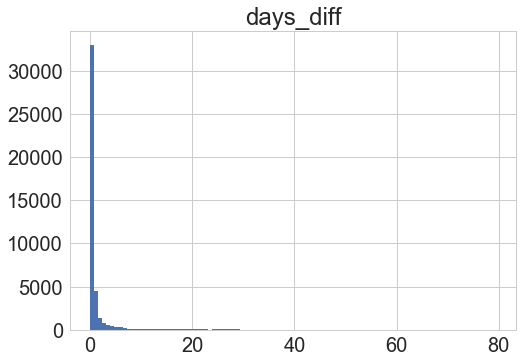

In [55]:
booking_diff.hist(column='days_diff',bins=100);

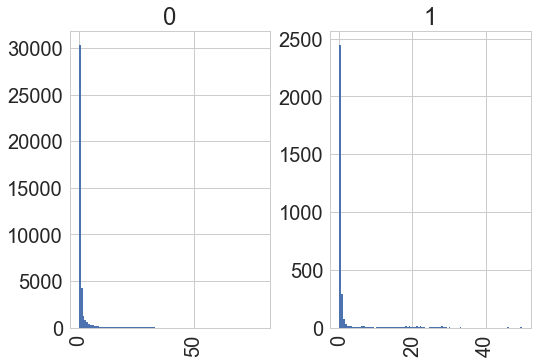

In [56]:
booking_diff.hist(column='days_diff', by='Car_Cancellation', bins=100);

**Most of the cancelled bookings are created 1-2 days prior to the from_date, which is logical because most of the bookings are created 1-2 days prior to the from_date. There seems to be no relation between date of booking and trip's start date with cancellation as all these graphs follow a similar distribution. Let's segregate these graphs.**

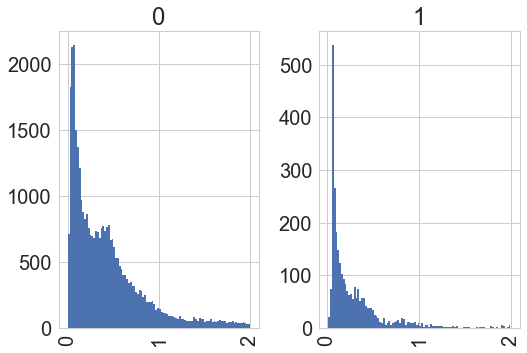

In [57]:
# Bookings created less than 2 days prior to the from_date
booking_diff[booking_diff["days_diff"]< 2].hist(column='days_diff', by='Car_Cancellation', bins=100);

(2, 40)

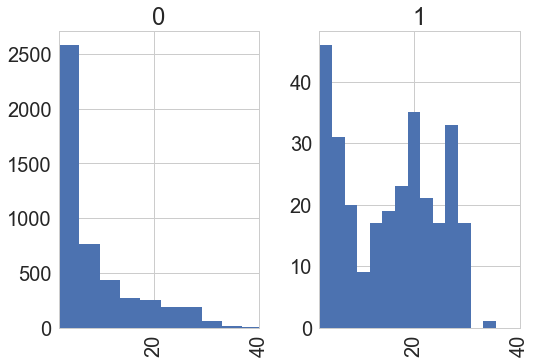

In [58]:
# Bookings created more than 2 days prior to the from_date
ax=booking_diff[booking_diff["days_diff"]> 2].hist(column='days_diff', by='Car_Cancellation', bins=20);
ax[0].set_xlim([2,40])
ax[1].set_xlim([2,40])

**This last plot seems to show that larger differences between booking creation and from_date tend to be more likely to be cancelled.**

## Data Preparation <a name="dpw"></a>

**As we saw before, many of the features contain missing values, one easy way of visualizing this is with a heatmap:**

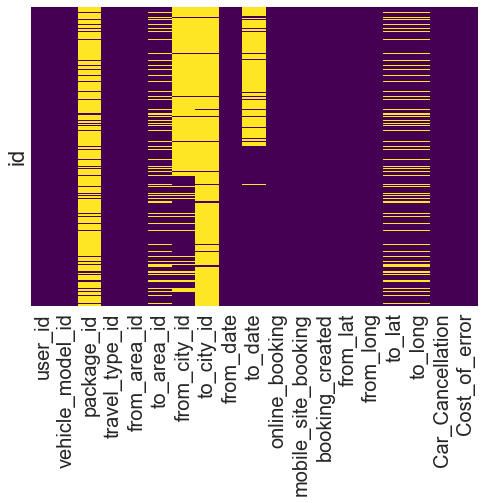

In [59]:
sns.heatmap(df_train.isnull(), yticklabels=False, cbar = False, cmap="viridis")

Looking at the package_id, from_city_id and to_city_id columns, it looks like we are just missing too much of that data to do something useful with it even at a basic level, so we'll just drop these columns.

** The following code creates 4 new columns called from_month, from_weekday, booking_month and booking_weekday **

In [60]:
df_train["from_month"] = df_train["from_date"].apply(lambda t: t.month)
df_train["from_weekday"] = df_train["from_date"].apply(lambda t: t.dayofweek)

df_train["booking_month"] = df_train["booking_created"].apply(lambda t: t.month)
df_train["booking_weekday"] = df_train["booking_created"].apply(lambda t: t.dayofweek)

In [61]:
booking_diff = df_train[['from_date', 'booking_created']]
booking_diff['difference'] = booking_diff['from_date'] - booking_diff['booking_created']
df_train["days_before_booking"] = booking_diff['difference'].apply(lambda x: x.total_seconds()/86400)
import warnings
warnings.filterwarnings('ignore')

/Users/Juan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [62]:
df_train.head()

,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,...,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error,from_month,from_weekday,booking_month,booking_weekday,days_before_booking
id,,,,,,,,,,,,,,,,,,,,,
132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,2013-01-01 02:00:00,NaT,...,77.672290,12.927320,77.635750,0,1.0,1,1,1,1,0.014583
132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,2013-01-01 09:00:00,NaT,...,77.749350,12.927680,77.626640,0,1.0,1,1,1,1,0.274306
132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,2013-01-01 03:30:00,NaT,...,77.626915,13.047926,77.597766,0,1.0,1,1,1,1,0.015278
132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,2013-01-01 05:45:00,NaT,...,77.553320,12.971430,77.639140,0,1.0,1,1,1,1,0.045833
132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,2013-01-01 09:00:00,NaT,...,77.677925,12.954340,77.600720,0,1.0,1,1,1,1,0.046528


**We are going to use the following variables as the features for out model:**

In [63]:
feats_names = ['vehicle_model_id', 'travel_type_id', 'from_area_id', 'to_area_id', 'from_weekday','from_month',
         'days_before_booking', 'online_booking', 'mobile_site_booking', 'booking_weekday', 'booking_month']

In [64]:
X = df_train[feats_names] # 11 features
y = df_train["Car_Cancellation"]

**Now we can take another look at our missing values heatmap**

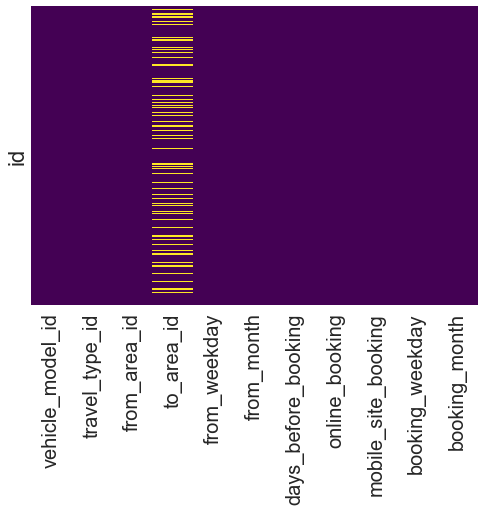

In [65]:
sns.heatmap(X.isnull(), yticklabels=False, cbar = False, cmap="viridis")

In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43431 entries, 132512 to 185941
Data columns (total 11 columns):
vehicle_model_id       43431 non-null int64
travel_type_id         43431 non-null int64
from_area_id           43343 non-null float64
to_area_id             34293 non-null float64
from_weekday           43431 non-null int64
from_month             43431 non-null int64
days_before_booking    43431 non-null float64
online_booking         43431 non-null int64
mobile_site_booking    43431 non-null int64
booking_weekday        43431 non-null int64
booking_month          43431 non-null int64
dtypes: float64(3), int64(8)
memory usage: 5.2 MB


** The only remaining variables with missing values are from_area_id and to_area_id we can impute a new level ( -9999 ) for these missing values:**

In [67]:
X["from_area_id"].fillna(-9999, inplace=True)
X["to_area_id"].fillna(-9999, inplace=True)